In [1]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u
import time

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

In [14]:
p = cogsworth.pop.Population(500, use_default_BSE_settings=True)
p.sample_initial_galaxy()
p.sample_initial_binaries()

In [15]:
# this population has some initial conditions
p.initial_binaries

,index,kstar_1,kstar_2,mass_1,mass_2,porb,ecc,metallicity,tphysf,mass0_1,mass0_2,rad_1,rad_2,lum_1,lum_2,massc_1,massc_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,tms_1,tms_2,bhspin_1,bhspin_2,tphys,binfrac
0,0,0.0,0.0,0.226616,0.196968,7.902619,0.567668,0.008181,10630.704990,0.226616,0.196968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,1,0.0,0.0,0.114457,0.089994,225.922400,0.508927,0.002960,8241.624761,0.114457,0.089994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,2,0.0,0.0,0.302681,0.163874,27.543268,0.173288,0.002527,8820.695128,0.302681,0.163874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,3,0.0,0.0,0.147824,0.133992,9.226240,0.208507,0.004398,8504.835938,0.147824,0.133992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,4,0.0,0.0,0.359252,0.314032,87.137307,0.119351,0.003971,10780.070181,0.359252,0.314032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,526,0.0,0.0,0.241499,0.166543,665.587041,0.358429,0.006649,8102.167199,0.241499,0.166543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
527,527,0.0,0.0,0.699683,0.353945,1.898187,0.045507,0.030000,1656.614841,0.699683,0.353945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
528,528,0.0,0.0,0.323788,0.258470,18135.512964,0.501732,0.012245,8690.954261,0.323788,0.258470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
529,529,0.0,0.0,0.135099,0.096897,13377.016304,0.094308,0.023247,5933.253135,0.135099,0.096897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [16]:
# but no evolution yet
p._bpp is None

True

A function for testing runtimes
===============================

Now let's make a quick function for testing the runtime of both the stellar evolution and the galactic orbit integration.

In [18]:
def test_runtime(pop, processes=1):
    # make a copy of the population
    p = pop.copy()

    # update number of processes
    p.processes = processes

    # start a timer and perform the stellar evolution
    start = time.time()
    p.perform_stellar_evolution()
    end = time.time()
    stellar_runtime = end - start

    # same thing for orbit integration
    start = time.time()
    p.perform_galactic_evolution(progress_bar=False)
    end = time.time()
    galactic_runtime = end - start

    return [stellar_runtime, galactic_runtime]

Apply the function
==================

Let's use this function to see how the runtime varies when using up to the 8 cores that my laptop has.

In [19]:
processes = range(1, 9)
runtimes = np.zeros((len(processes), 2))
for i, proc in enumerate(processes):
    runtimes[i] = test_runtime(p, processes=proc)

In [22]:
runtime_total = runtimes.sum(axis=1)

## Plotting time!
Now let's make a plot of how the runtime changes as we change the number of processes. We can show the contributions from both stellar evolution and galactic orbit integration as well as the relative speedup of the total runtime.

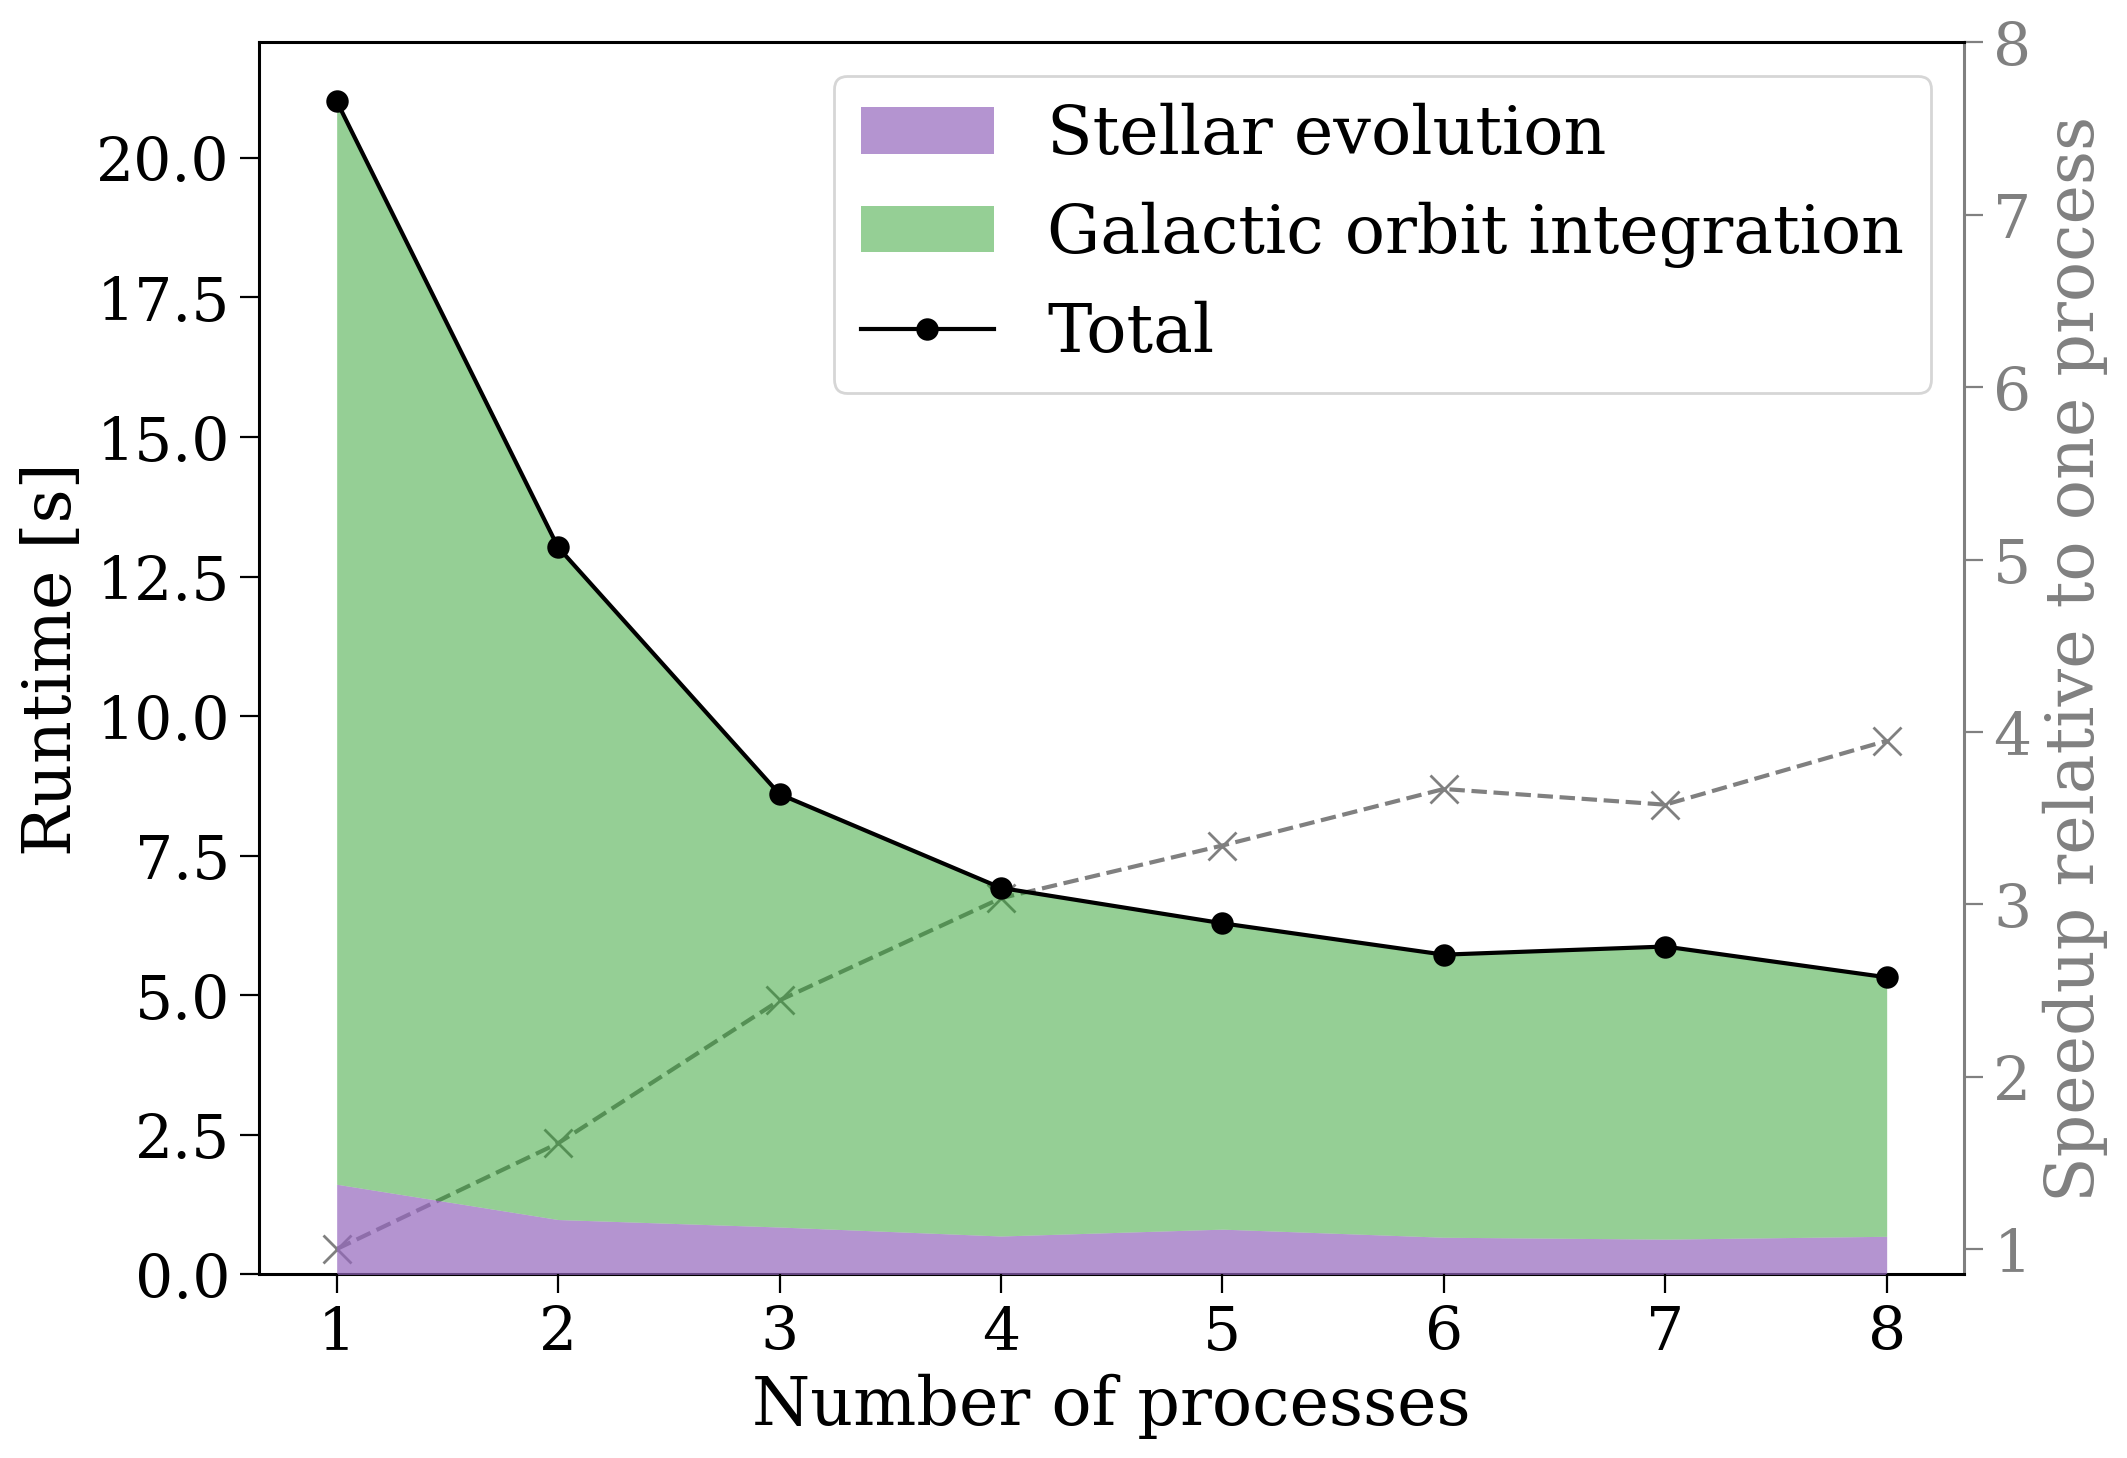

In [29]:
fig, ax = plt.subplots(figsize=(11, 8))

# area fill for the stellar evolution
ax.fill_between(processes, 0, runtimes[:, 0], edgecolor="none", lw=0.0,
                color="tab:purple", alpha=0.7, label="Stellar evolution")
# same thing for the orbit integration
ax.fill_between(processes, runtimes[:, 0], runtime_total, edgecolor="none", lw=0.0,
                color="tab:green", alpha=0.5, label="Galactic orbit integration")
# add some markers for the total runtime
ax.plot(processes, runtime_total,
        marker="o", markersize=np.sqrt(50 * (i * 0 + 1)**2), zorder=10-i, color="k", label="Total")

# label the number of processes and fix the bottom of y axis to start at 0
ax.set(xticks=processes, xticklabels=[str(p) for p in processes],
       xlabel="Number of processes", ylabel="Runtime [s]")
ax.set_ylim(bottom=0.0)

# add a legend
ax.legend(loc="upper right")

# add a second y-axis for speedup, make sure it's behind
right_ax = ax.twinx()
ax.set_zorder(right_ax.get_zorder()+1)
ax.set_frame_on(False)

# plot the relative speedup
right_ax.plot(processes, runtime_total[0] / runtime_total,
              marker="x", markersize=np.sqrt(100), zorder=-10, color="grey", linestyle="--")

# set some ticks and change the colour of the right side
right_ax.set(xticks=processes, xticklabels=[str(p) for p in processes],
             yticks=processes, yticklabels=[str(p) for p in processes])
right_ax.set_ylabel("Speedup relative to one process", color="grey")
right_ax.spines['right'].set_color('grey')
right_ax.tick_params(axis='y', colors='grey')
    
plt.show()

## Interpretation
So what do we learn from this plot? Well firstly you can see the galactic orbit integration takes longer than the stellar evolution. This is partly due to our default assumptions, if we integrated shorter orbits (say only 10 Myr instead of potentially 12 Gyr) then this could be much faster.

We can also see that once we go beyond 3, *maybe* 4 processes the gains in runtime don't keep up with the additional processes. This is because we have a pretty small population and the runtime is often dominated by a few complicated sources, so any additional processes are not going to help with the computation if it's just a couple of binaries that are taking a while.

The exact number of processes is population dependent though and that's why **you should do your own tests to decide how many processes to use!!**

For example, in a case of "here's one I made earlier", this is a bigger test of up to 128 processes on a 1000 binary population that I did more carefully on a computing cluster.

![](../../_static/runtime_10000.png)

In this case the turnover is closer to 16 processes and so you can see it's important to try this yourself for your own population!

Wrap-up
=======

And that's all for some simple runtime testing of how your simulations run with different numbers of cores. You can hopefully use this information to make decisions about how to run your simulations in the future!